<a href="https://colab.research.google.com/github/ReidelVichot/DSTEP23/blob/main/week_11/dstep23_milwaukee_census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **DSTEP23 // Mapping Neighborhood Segregation in Milwaukee**

*November 9, 2023*

This notebook will provide an example of color-based visualizations of the spatial distribution of race in Milwaukee, Wisconsin.  The census data is available [here](https://data.census.gov/cedsci/table?t=Race%20and%20Ethnicity&g=0500000US55079%241400000&y=2018&tid=ACSDT5Y2018.B02001&hidePreview=true) <small>(see [this](https://www.census.gov/library/stories/2021/08/improved-race-ethnicity-measures-reveal-united-states-population-much-more-multiracial.html) description for more on definitions and details of this data)</small> and the census tract shapes are available [here](https://www.census.gov/cgi-bin/geo/shapefiles/index.php).

---

In [ ]:
!pip install contextily

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import contextily as ctx

In [31]:
dpath = "/content/drive/Shareddrives/dstep23/data/"
cname = dpath + "census/milwaukee/ACSDT5Y2018.B02001_data_with_overlays_2021-11-03T112830.csv"
census = pd.read_csv(cname, skiprows=1)

# -- pull off only columns we will use
cind = [0,2,4,6,8,10,12,14]
cols = census.columns[cind]
census = census[cols]
census.columns = census.columns.str.split("!!").str[-1].str.lower().str.replace(" ","_")

# --  load census tract shapes
sname = dpath + "geos/wisconsin/tl_2018_55_tract.shp"
ctshp = gp.read_file(sname)

# -- add GEOID to census data
census["geoid"] = census["id"].str.split("US").str[-1]

# -- merge the census data and tract shapes
milw = ctshp.merge(census, left_on="GEOID" , right_on="geoid")

# -- remove census with 0 population
milw = milw[milw["total"] > 0]



In [37]:
# -- add a column that is the total number of non white alone
cols = milw.columns[16:21]
milw["non_white_alone"] = milw[cols].sum(axis=1)

# -- make a column of total fraction of white alone to non white alone
milw["wfrac"] = milw["white_alone"] / (milw["white_alone"] + milw["non_white_alone"])

# -- create a columns of difference in totals of white vs non-white
milw["wdiff"] = milw["white_alone"] - milw['non_white_alone']

# -- reate a column of the largets population by race
milw["race"] = milw[milw.columns[15:21]].idxmax(axis=1).str.replace("_", " ")

<Axes: >

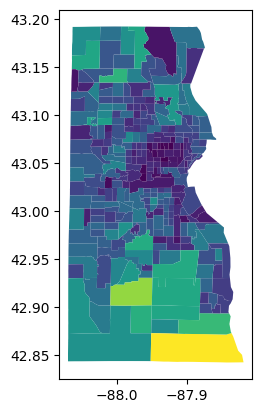

In [32]:
# -- make a choropleth of total population
milw.plot("total")

<Axes: >

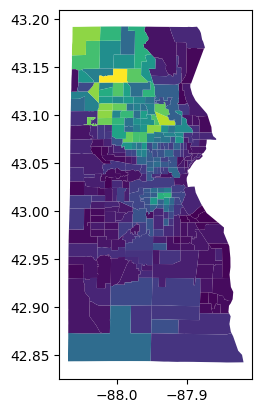

In [35]:
# -- make a choropleth of non white alone
milw.plot("non_white_alone")

In [ ]:
# -- make choropleth of race
fig, ax = plt.subplots(figsize=(12,8))
milw.plot("race", edgecolor="")

In [28]:
census["geoid"].dtype

dtype('O')

In [29]:
ctshp["GEOID"].dtype

dtype('O')

In [22]:
census["id"].str.split("US").str[-1]

0      55079000101
1      55079000102
2      55079000201
3      55079000202
4      55079000301
          ...     
293    55079187200
294    55079187300
295    55079187400
296    55079980000
297    55079990000
Name: id, Length: 298, dtype: object

<Axes: >

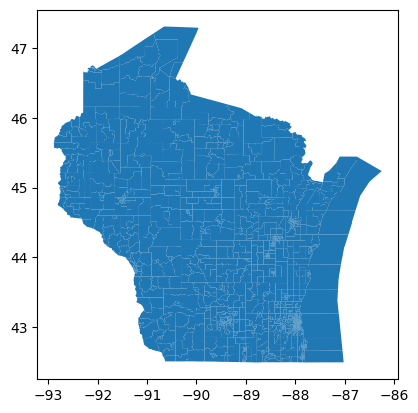

In [21]:
ctshp.plot()